<a href="https://colab.research.google.com/github/mirsazzathossain/CSE317-Lab/blob/main/Lab_5_Polynomial_Interpolation_and_Least_Square_Fitting_Solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this assignment, we will examine polynomial interpolation and least square fitting of polynomials to a set of points.

Input: Suppose we have n points: $(t_1, y_1), (t_2, y_2), \ldots , (t_n, y_n)$.

#### **Import necessary packages:**

In [1]:
import numpy as np
import matplotlib.pyplot as plt

#### **A. Polynomial Interpolation:**
First, we would like to fit a polynomial of degree n-1 to the set of points, i.e. we will fit a polynomial:

$$p(t) = c_0 + c_1t + \cdots + c_{n−1}t^{n−1}$$

So that it goes through all the n points. Our task is to find the coefficient $c_0, c_1, \ldots , c_{n-1}$.

In this assignment $n=7$, we will fit a $6$-degree polynomial. The $7$ points are as follows:

$$(1, 4), (3, 7), (4, 2), (7, 2), (10, 5), (12, 10), (15, 4)$$

##### **Step 1: Set up the system of linear equations**
We can set up the system of equations $Ac=y$ to represent the n given conditions $p(t_i)=y_i$ that the polynomial must satisfy. Here, $c$ is the vector of coefficients and $y$ is the vectors of the $y_i$’s.  The matrix $A$ is called the Vandermonde matrix which represents the coefficients of the $n$ linear equations (linear in terms of the $c_i$’s).

☢ Long story huh..? 🤯 Let's go step by step. 🔽

⚡ From the given data point create two numpy array $t$ and $y$

⚡ Using $t$ create the vendermonde matrix. (How 🤔? You have go through your lecture first.)

**Hint: You can use `np.vander()` to create $A$. Saw the `numpy` documentation for more details.
 
That's all you have to do for this step. 👻


In [2]:
t = np.array([1, 3, 4, 7, 10, 12, 15])
y = np.array([4, 7, 2, 2, 5, 10, 4])

A = np.vander(t, increasing=True)
print(A)

[[       1        1        1        1        1        1        1]
 [       1        3        9       27       81      243      729]
 [       1        4       16       64      256     1024     4096]
 [       1        7       49      343     2401    16807   117649]
 [       1       10      100     1000    10000   100000  1000000]
 [       1       12      144     1728    20736   248832  2985984]
 [       1       15      225     3375    50625   759375 11390625]]


##### **Step 2: Find the coefficient vector $c$**
Since the Vandermonde matrix is invertible if $t_i ≠ t_j$, for $i ≠ j$ (see slide on inverses), we can simply find $c$ using `c = np.linalg.inv(A).dot(y)`. Of course, you can use the QR-decomposition of $A$ to find the inverse if you want.😜

In [3]:
c = np.linalg.inv(A).dot(y)
print(c)

[-3.37575758e+01  6.28880231e+01 -3.12842232e+01  6.86690316e+00
 -7.52765753e-01  4.04882155e-02 -8.49767516e-04]


##### **Step 3: Plot the points and the polynomial**
⚡ Plot the given n points

⚡ Calculate the value of $p$ for given $t$ using coefficient vector $c$

⚡ Plot the polynomial

Predicted points:  [ 4.  7.  2.  2.  5. 10.  4.]


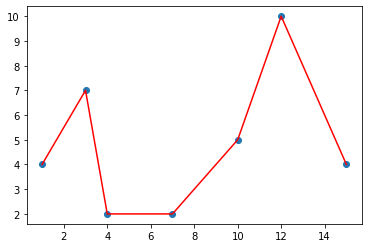

In [4]:
p = A.dot(c)
print('Predicted points: ', p)

plt.scatter(t, y, marker='o')
plt.plot(t, p, 'r')
plt.show()

#### **B. Polynomial interpolation using two cubic polynomials:**
In this part, you we will fit the following two cubic polynomials $p(t)$ and $q(t)$ to the n points:

$$p(t) = c_0 + c_1 t + c_2 t^2 + c_3 t^3, q(t) = d_0 + d_1t + d_2 t^2 + d_3 t^3$$

that satisfies the following conditions:

$$p(1) = 4$$ 
$$p(3) = 7$$ 
$$p(4) =2$$
$$q(10) = 5$$ 
$$q(12) = 10$$ 
$$p(15) = 4$$
$$p(7) = q(7)$$ 
$$ p’(7) = q’(7)$$

**Note: $p’(7)$ and $q'(7)$ are the derivatives of $p(t)$ and $q(t)$ at $t = 7$ respectively

##### **Step 1: Set up the system of linear equations**
We can set up the system of equations $Ax=b$ to represent the given conditions that the polynomials must satisfy. Here, $x$ is the vector of coefficients:   

$$x=[c_0, c_1, c_2, c_3, d_0, d_1, d_2, d_3]$$

The matrix $A$ is called the Vandermonde matrix.

💥 Stucked again? Need hints?😲 Here you go: 🔽

⚡ From given conditions create three numpy array $p_t, q_t$ and $b$

⚡ Using $p_t, q_t$ and the conditions make the Vendermonde matrix $A$ (This is the tricky part. 👊)

**Hint: You can use `np.column_stack((..,..))` and `np.row_stack((..,..))` to creat matrix $A$. Saw the `numpy` documentation for more details.

In [5]:
p_t = np.array([1, 3, 4, 15])
q_t = np.array([10, 12])
b = np.array([4, 7, 2, 4, 5, 10, 0, 0])

A = np.column_stack((p_t**0, p_t**1, p_t**2, p_t**3, np.zeros((4,4), dtype=int)))
A = np.row_stack((A, np.column_stack((np.zeros((2, 4), dtype=int), q_t**0, q_t**1, q_t**2, q_t**3))))
A = np.row_stack((A, np.column_stack(([1, 7, 7**2, 7**3, -1, -7, -7**2, -7**3]))))
A = np.row_stack((A, np.column_stack(([0, 7, 2*7, 3*7**2, 0, -1, -2*7, -3*7**2]))))

print(A)

[[   1    1    1    1    0    0    0    0]
 [   1    3    9   27    0    0    0    0]
 [   1    4   16   64    0    0    0    0]
 [   1   15  225 3375    0    0    0    0]
 [   0    0    0    0    1   10  100 1000]
 [   0    0    0    0    1   12  144 1728]
 [   1    7   49  343   -1   -7  -49 -343]
 [   0    7   14  147    0   -1  -14 -147]]


##### **Step 2: Find the coefficient vector $x$**
You have to find the coefficient vector $x$. This time find your way around, no hints from this side.🚸

In [6]:
x = np.linalg.inv(A).dot(b)
print(x)

[-6.22727273e+00  1.36931818e+01 -3.65151515e+00  1.85606061e-01
 -3.40693333e+03  1.08084384e+03 -1.12082222e+02  3.81171717e+00]


##### **Step 3: Plot the points and the polynomials**
⚡ Plot the given points given in condition

⚡ Plot the polynomials

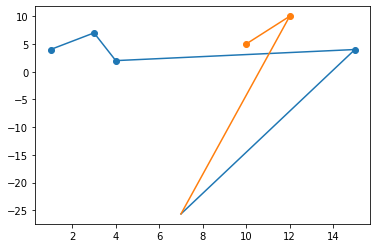

In [7]:
plt.scatter(p_t, b[:4])
plt.scatter(q_t, b[4:6])

p_t = np.concatenate((p_t, [7]))
p = x[0] + x[1]*p_t + x[2]*p_t**2 + x[3]*p_t**3

q_t = np.concatenate((q_t, [7]))
q = x[4] + x[5]*q_t + x[6]*q_t**2 + x[7]*q_t**3

plt.plot(p_t, p)
plt.plot(q_t, q)

plt.show()

#### **C. Least-square polynomial fitting:**
Now we will fit a quadratic polynomial $p(t) = c_0 + c_1 t + c_2 t^2$ , to the $n = 7$ points. Of course, we do not require here that all the conditions will be satisfied. We wish to find a polynomial that minimized the sum of squared errors at each $t_i$.

##### **Step 1: Set up the system of linear equations**
Set up a system of equations $Ac = y$ that corresponds to the points. $Ac = y$, is unlikely to have a solution and so we aim to find $c$, that minimizes $∥ Ac − y ∥^2$.

In [8]:
t = np.array([1, 3, 4, 7, 10, 12, 15])
y = np.array([4, 7, 2, 2, 5, 10, 4])

A = np.column_stack((t**0, t**1, t**2))
print(A)

[[  1   1   1]
 [  1   3   9]
 [  1   4  16]
 [  1   7  49]
 [  1  10 100]
 [  1  12 144]
 [  1  15 225]]


##### **Step 2: Find the coefficient vector $c$**
We find $c$ using $c = A^† y = (A^T A)^{−1} A^T y = R^{−1} Q^T y$, where $A = QR $ is the QR-decomposition of the matrix $A$. Numpy function `np.linalg.pinv(A)` gives you the pseudo-inverse $A^†$

In [9]:
c = np.linalg.pinv(A).dot(y)
print(c)

[3.84514148e+00 9.98777732e-02 3.47493640e-03]


##### **Step 3: Plot the points and the polynomial**
⚡ Plot the given points given in condition

⚡ Plot the polynomial

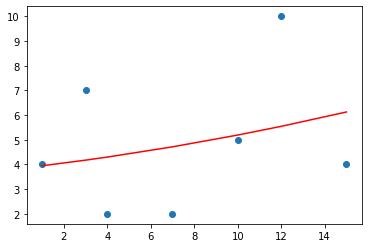

In [10]:
plt.scatter(t, y)

p = c[0] + c[1]*t + c[2]*t**2

plt.plot(t, p, 'r')
plt.show()